# INFO BASICA

# LIBRERIAS

In [1]:
import warnings
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import math
from statistics import mean 
from itertools import product
from sklearn.model_selection import TimeSeriesSplit

C:\Users\migue\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# opciones del notebook

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

# LECTURA DE DATOS

In [3]:
# Leo los indicadores

US_Treasury = pd.read_excel('./data/Series de precios.xlsx', sheet_name='Datos de precios', 
                           usecols=['TY1 Comdty', 'US Treasury'])

US_Treasury.columns = ['Date','Precio']
US_Treasury = US_Treasury.iloc[1:,:]
US_Treasury['Date'] = pd.to_datetime(US_Treasury['Date'], format="%Y-%m-%d")
US_Treasury = US_Treasury.set_index('Date')
US_Treasury = US_Treasury.loc['2015-04-30':,:]
US_Treasury = US_Treasury.applymap(lambda x: x/1.1285216494845334)

In [4]:
# Procedo a calcular las medias moviles para 10, 30, 50 y 100 dias

US_Treasury['10MM'] = US_Treasury.Precio.rolling(window=10).mean()
US_Treasury['30MM'] = US_Treasury.Precio.rolling(window=30).mean()
US_Treasury['50MM'] = US_Treasury.Precio.rolling(window=50).mean()
US_Treasury['100MM'] = US_Treasury.Precio.rolling(window=100).mean()

In [5]:
# Visualizo una muestra

US_Treasury.head(20)

,Precio,10MM,30MM,50MM,100MM
Date,,,,,
2015-04-30,113.755018,NaN,NaN,NaN,NaN
2015-05-01,113.228887,NaN,NaN,NaN,NaN
2015-05-04,113.215041,NaN,NaN,NaN,NaN
2015-05-05,112.910439,NaN,NaN,NaN,NaN
2015-05-06,112.619683,NaN,NaN,NaN,NaN
2015-05-07,112.882748,NaN,NaN,NaN,NaN
2015-05-08,113.270423,NaN,NaN,NaN,NaN
2015-05-11,112.439691,NaN,NaN,NaN,NaN
2015-05-12,112.578146,NaN,NaN,NaN,NaN


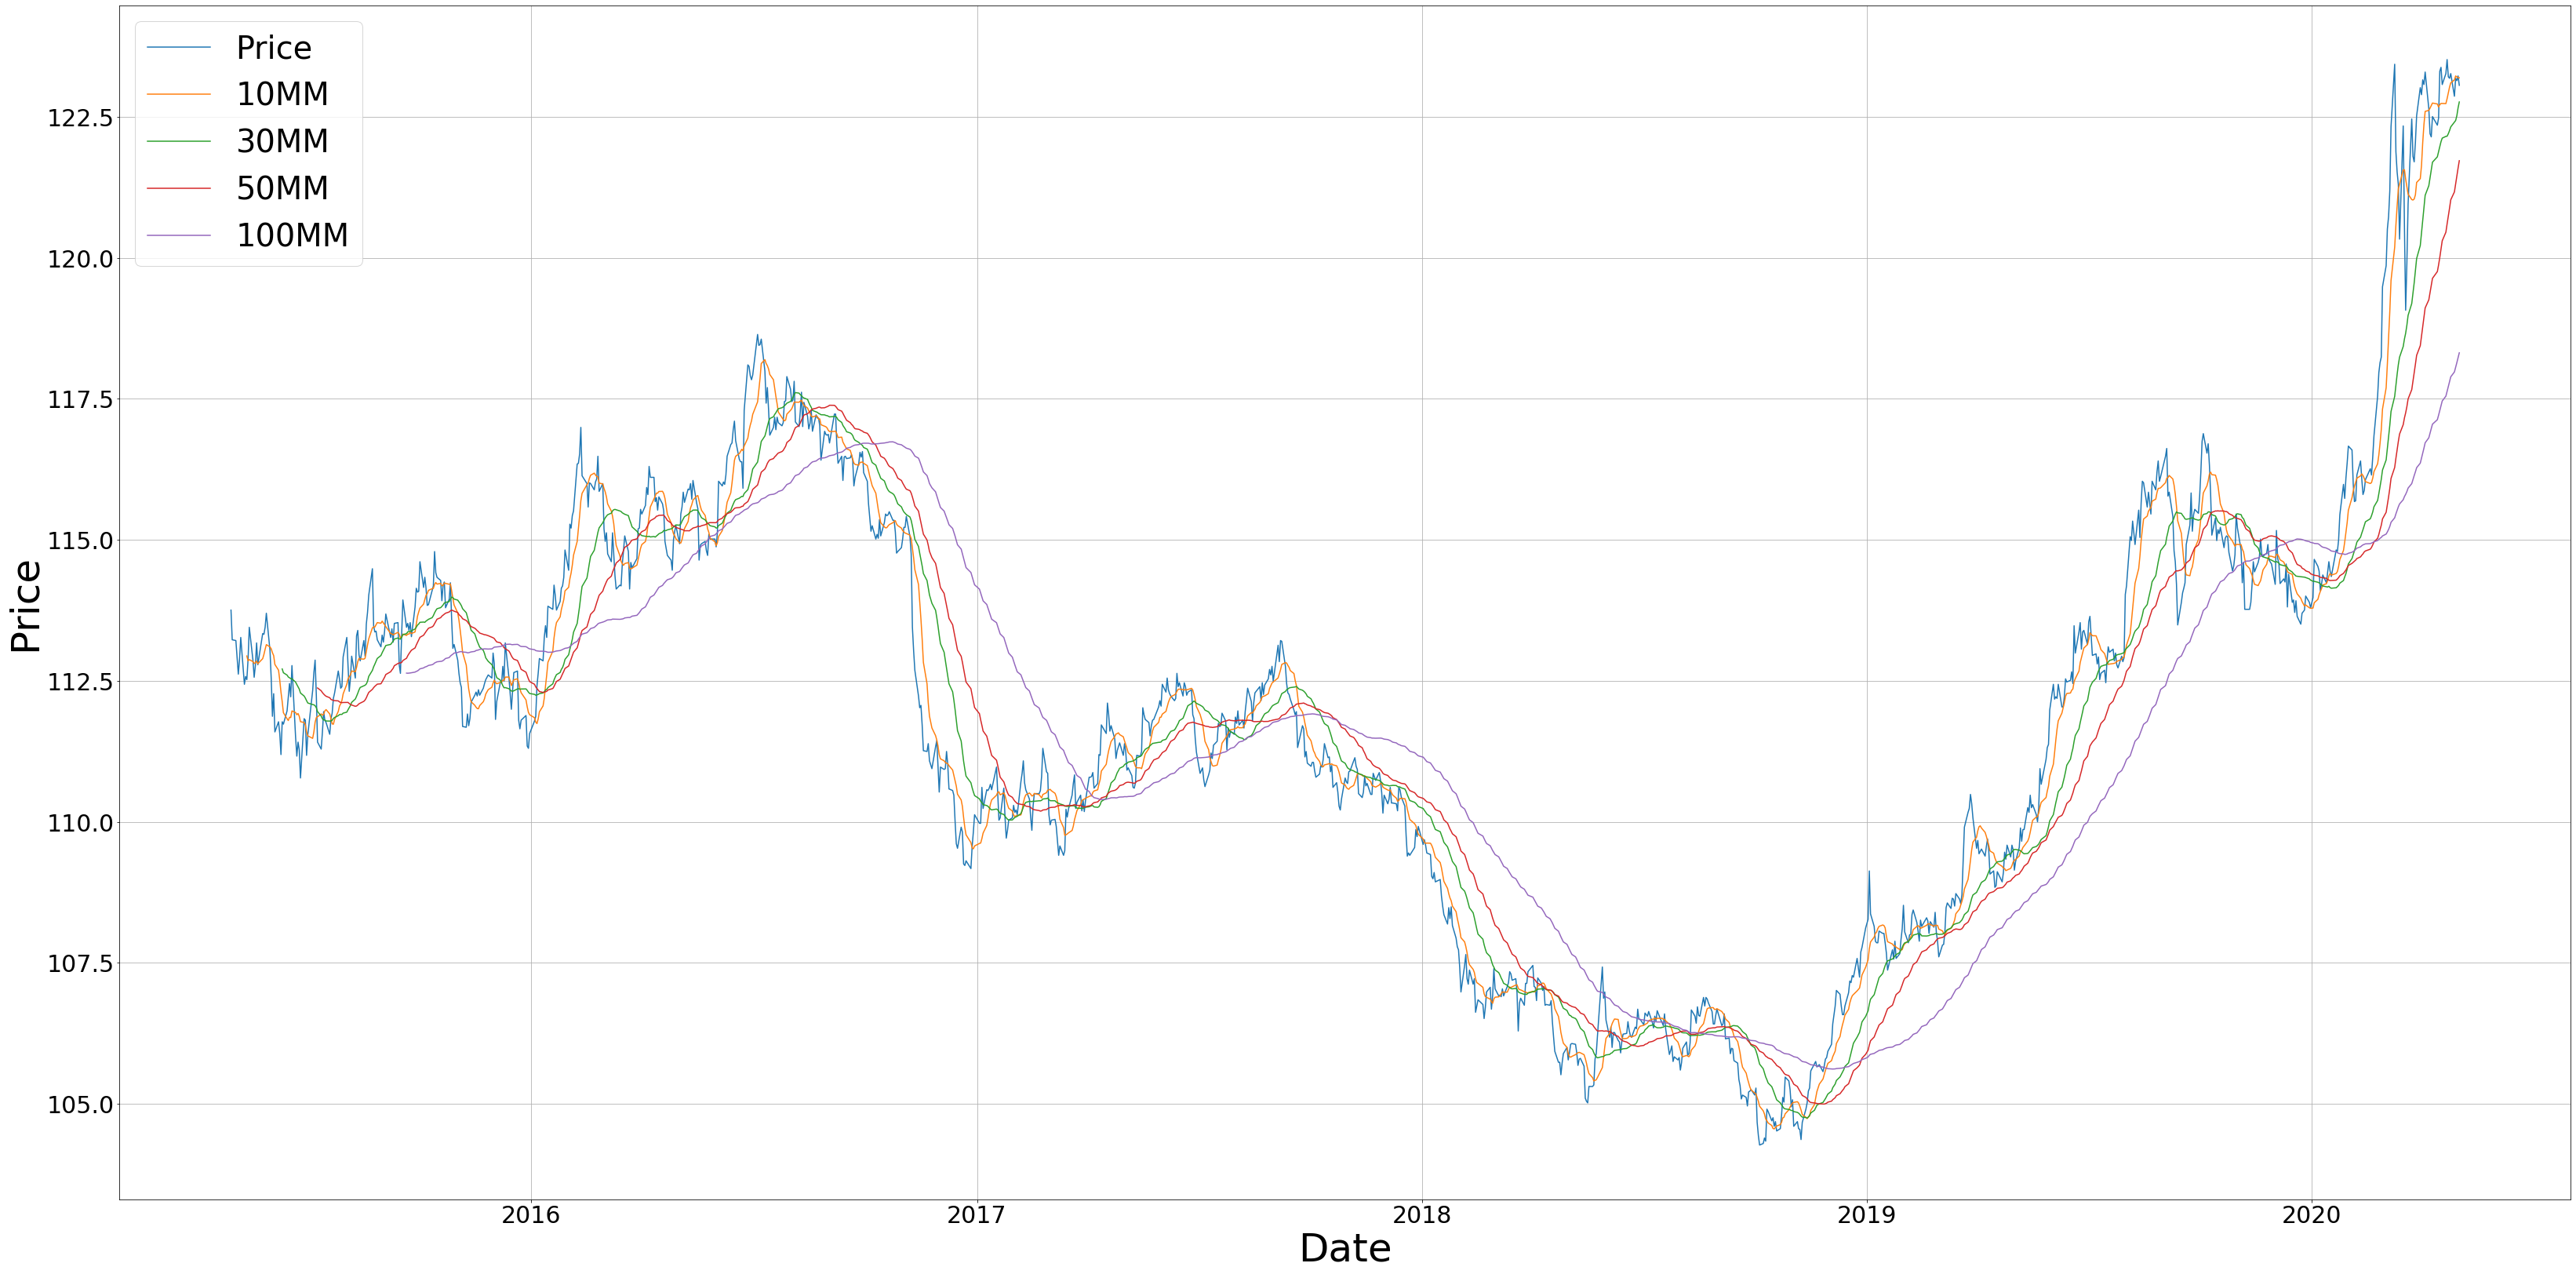

In [6]:
# Ploteo las series

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(US_Treasury["Precio"])
ax1 = plt.plot(US_Treasury["10MM"])
ax1 = plt.plot(US_Treasury["30MM"])
ax1 = plt.plot(US_Treasury["50MM"])
ax1 = plt.plot(US_Treasury["100MM"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
ax1 = plt.ylabel("Price", fontsize=50)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Price", "10MM", "30MM", "50MM", "100MM"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [7]:
# Ahora establezco señales, serán a corto, a medio y a largo y para ello utilizaré las medias móviles

# 1 es posición larga y -1 posición corta

US_Treasury['Señal a corto'] = np.where((np.isnan(US_Treasury['10MM']) | np.isnan(US_Treasury['30MM'])), 0, np.where((US_Treasury['10MM']>US_Treasury['30MM']), 1, -1))
US_Treasury['Señal a medio'] = np.where((np.isnan(US_Treasury['30MM']) | np.isnan(US_Treasury['50MM'])), 0, np.where((US_Treasury['30MM']>US_Treasury['50MM']), 1, -1))
US_Treasury['Señal a largo'] = np.where((np.isnan(US_Treasury['50MM']) | np.isnan(US_Treasury['100MM'])), 0, np.where((US_Treasury['50MM']>US_Treasury['100MM']), 1, -1))

In [8]:
# Visualizo una muestra, hay que mirar que si hay algún NaN devuelve True y no es así

US_Treasury.sample(20)

,Precio,10MM,30MM,50MM,100MM,Señal a corto,Señal a medio,Señal a largo
Date,,,,,,,,
2018-10-30,105.253851,104.945096,104.895713,105.467350,105.872332,1,-1,-1
2017-11-02,110.888989,110.578849,110.942987,111.551083,111.669186,-1,-1,-1
2019-02-13,107.884505,108.139263,108.012346,107.606764,106.310405,1,1,1
2018-08-14,106.430723,106.091507,106.215655,106.240485,106.261392,-1,-1,-1
2016-10-04,115.638012,116.229217,116.555972,116.861681,116.713811,-1,-1,1
2016-01-08,112.896594,111.950943,112.274928,112.311204,113.026742,-1,-1,-1
2016-02-17,115.582630,116.009073,114.449141,113.532381,113.375650,1,1,1
2016-11-08,114.751897,115.024654,115.344948,115.828804,116.585878,-1,-1,-1
2018-07-20,106.319959,106.470875,106.381340,106.206148,106.435846,1,1,-1


In [9]:
# Ahora determino el valor del conjunto de señales

def señalMM(corto=.8, medio=.15, largo=.05):
    US_Treasury['Señal MM'] = corto*US_Treasury['Señal a corto'] + medio*US_Treasury['Señal a medio'] + largo*US_Treasury['Señal a largo']


señalMM()

In [10]:
# Visualizo una muestra

US_Treasury.sample(20)

,Precio,10MM,30MM,50MM,100MM,Señal a corto,Señal a medio,Señal a largo,Señal MM
Date,,,,,,,,,
2018-03-08,107.039927,106.987314,107.191305,107.962040,109.258676,-1,-1,-1,-1.00
2019-08-07,115.333410,113.779939,113.260270,112.925115,111.302002,1,1,1,1.00
2020-01-09,114.211921,114.137155,114.200383,114.332100,114.883014,-1,-1,-1,-1.00
2015-11-13,112.121243,112.129550,113.397341,113.462600,113.013727,-1,-1,1,-0.90
2018-05-18,105.309234,105.539070,106.023664,106.437646,107.199843,-1,-1,-1,-1.00
2020-03-03,120.511645,118.121903,116.623353,115.626105,115.141372,1,1,1,1.00
2016-12-16,109.532126,110.491622,111.617727,113.044187,114.913059,-1,-1,-1,-1.00
2017-07-25,111.276665,111.527269,111.678185,111.792827,111.256312,-1,-1,1,-0.90
2016-01-11,112.855057,112.056169,112.286005,112.296251,113.025911,-1,-1,-1,-1.00


In [11]:
# Ahora calculo las resistencia y soportes

US_Treasury['Resistencia'] = US_Treasury.Precio.rolling(window=100).max()
US_Treasury['Soporte'] = US_Treasury.Precio.rolling(window=100).min()

In [12]:
# Visualizo una muestra

US_Treasury.sample(20)

,Precio,10MM,30MM,50MM,100MM,Señal a corto,Señal a medio,Señal a largo,Señal MM,Resistencia,Soporte
Date,,,,,,,,,,,
2016-06-21,116.385672,116.565664,115.755238,115.579307,115.477681,1,1,1,1.00,117.105640,114.128847
2018-12-14,106.735325,106.573332,105.664603,105.306188,105.651219,1,1,-1,0.90,107.012236,104.270818
2017-06-16,112.467382,112.353848,111.794950,111.606189,110.954756,1,1,1,1.00,112.633528,109.407516
2015-09-10,113.187350,113.316114,113.203965,112.722417,NaN,1,1,0,0.95,NaN,NaN
2020-03-25,121.702362,121.043314,119.558148,117.961295,116.140052,1,1,1,1.00,123.433055,113.505798
2016-07-07,118.462504,117.861607,116.617815,116.128975,115.696994,1,1,1,1.00,118.642496,114.128847
2017-10-13,111.387429,111.010830,111.743259,111.937928,111.869946,-1,-1,1,-0.90,113.215041,110.625924
2016-10-25,115.347255,115.329256,115.794928,116.227002,116.731672,-1,-1,-1,-1.00,118.642496,115.014962
2017-01-13,110.570542,110.389165,110.212865,111.178915,113.593994,1,-1,-1,0.60,117.230250,109.172141


In [13]:
# Genero la señal de resistencias y soportes

US_Treasury['Señal R/S'] = np.where((US_Treasury.Precio >= US_Treasury.Resistencia), 1, 
                              np.where((US_Treasury.Precio <= US_Treasury.Soporte), -1, 0))

In [14]:
# Visualizo una muestra

US_Treasury.sample(20)

,Precio,10MM,30MM,50MM,100MM,Señal a corto,Señal a medio,Señal a largo,Señal MM,Resistencia,Soporte,Señal R/S
Date,,,,,,,,,,,,
2015-10-15,114.419604,114.243765,113.747172,113.558134,112.828197,1,1,1,1.00,114.793434,110.778225,0
2018-03-05,106.915317,106.898702,107.327453,108.109634,109.380794,-1,-1,-1,-1.00,111.387429,106.513796,0
2017-04-04,110.792070,110.462546,110.278401,110.288646,110.498960,1,-1,-1,0.60,113.450415,109.172141,0
2015-07-16,111.802795,111.968942,111.806026,112.245022,NaN,1,-1,0,0.65,NaN,NaN,0
2016-05-06,115.665703,115.199108,115.411407,115.161448,114.556675,-1,1,1,-0.60,116.994876,111.304356,0
2016-08-31,116.856420,116.985184,117.203020,117.361229,116.470268,-1,-1,1,-0.90,118.642496,114.461140,0
2017-07-06,110.750534,111.590958,112.018324,111.711692,111.140978,-1,1,1,-0.60,112.633528,109.407516,0
2016-02-04,115.430329,114.552521,113.239040,112.945607,113.146921,1,1,-1,0.90,115.430329,111.304356,1
2015-10-01,114.087311,113.723173,113.508567,113.224179,112.693202,1,1,1,1.00,114.488832,110.778225,0


In [15]:
# Genero la señal total

def señal_total(medias=.5, RS=.5):
    US_Treasury['Señal Total'] = medias*US_Treasury['Señal MM'] + RS*US_Treasury['Señal R/S']
    
señal_total()

In [16]:
# Resultado final

US_Treasury.sample(20)

,Precio,10MM,30MM,50MM,100MM,Señal a corto,Señal a medio,Señal a largo,Señal MM,Resistencia,Soporte,Señal R/S,Señal Total
Date,,,,,,,,,,,,,
2015-09-10,113.187350,113.316114,113.203965,112.722417,NaN,1,1,0,0.95,NaN,NaN,0,0.475
2017-11-27,110.875144,110.653615,110.734842,110.950463,111.484902,-1,-1,-1,-1.00,113.215041,110.210557,0,-0.500
2018-03-12,107.081464,106.981776,107.102694,107.853768,109.173387,-1,-1,-1,-1.00,111.152055,106.513796,0,-0.500
2017-01-31,110.293631,110.124715,110.057333,110.399964,112.851596,1,-1,-1,0.60,116.676428,109.172141,0,0.300
2016-06-06,115.956460,115.163110,115.295565,115.384362,115.189693,-1,-1,1,-0.90,116.994876,113.270423,0,-0.450
2016-12-08,111.013599,111.032983,112.587838,113.728157,115.332856,-1,-1,-1,-1.00,117.894836,110.529005,0,-0.500
2018-04-24,105.738446,106.422416,106.851628,106.879042,108.012438,-1,-1,-1,-1.00,110.612078,105.738446,-1,-1.000
2017-06-19,112.232007,112.346925,111.837409,111.633326,110.979954,1,1,1,1.00,112.633528,109.407516,0,0.500
2017-12-14,110.570542,110.418241,110.618540,110.692936,111.364307,-1,-1,-1,-1.00,113.215041,110.155175,0,-0.500


In [17]:
# Genero un nuevo dataframe donde ver los resultados de la estrategia

Resultados = US_Treasury.loc[:,['Precio', 'Señal Total']]

In [18]:
# Creo la variable que muestra los resultados

Resultados['Trending Following'] = 100

for i in range(1, len(Resultados)):
    
    Resultados['Trending Following'].iloc[i] = Resultados['Trending Following'].iloc[i-1]*(1+Resultados['Señal Total'].iloc[i]*
                                                                          (Resultados.Precio.iloc[i]/Resultados.Precio.iloc[i-1]-1))

In [19]:
# Visualizo una muestra

Resultados.sample(20)

,Precio,Señal Total,Trending Following
Date,,,
2015-11-19,112.342772,-0.450,101.244659
2019-09-16,113.893473,-0.300,123.821641
2015-06-22,111.498193,-0.400,99.885095
2017-10-05,110.902835,-0.300,108.796076
2019-01-04,108.369100,0.500,116.981782
2017-05-17,112.024324,-0.300,107.226049
2019-04-11,109.490589,0.500,117.477425
2016-12-02,110.972062,-0.500,107.553949
2016-08-09,117.271787,-0.300,102.405774


In [20]:
# Genero el Buy&Hold para hacer la comparación

Resultados['Buy&Hold'] = 100

for i in range(1, len(Resultados)):
    
    Resultados['Buy&Hold'].iloc[i] = Resultados['Buy&Hold'].iloc[i-1]*(1+(Resultados.Precio.iloc[i]/
                                                                         Resultados.Precio.iloc[i-1]-1))

In [21]:
# Visualizo una muestra

Resultados.sample(20)

,Precio,Señal Total,Trending Following,Buy&Hold
Date,,,,
2019-01-28,107.662977,0.500,116.600885,94.644596
2016-03-14,114.198075,-0.300,102.543107,100.389484
2016-03-17,114.807279,-0.300,102.379251,100.925024
2016-11-15,112.024324,-1.000,106.239108,98.478578
2020-03-05,121.190076,1.000,128.595684,106.536027
2019-10-17,115.111881,0.350,123.329886,101.192795
2018-04-27,105.890747,-0.500,114.977407,93.086660
2015-11-27,112.605837,-0.450,101.138041,98.989776
2016-03-23,114.599596,-0.300,102.433645,100.742454


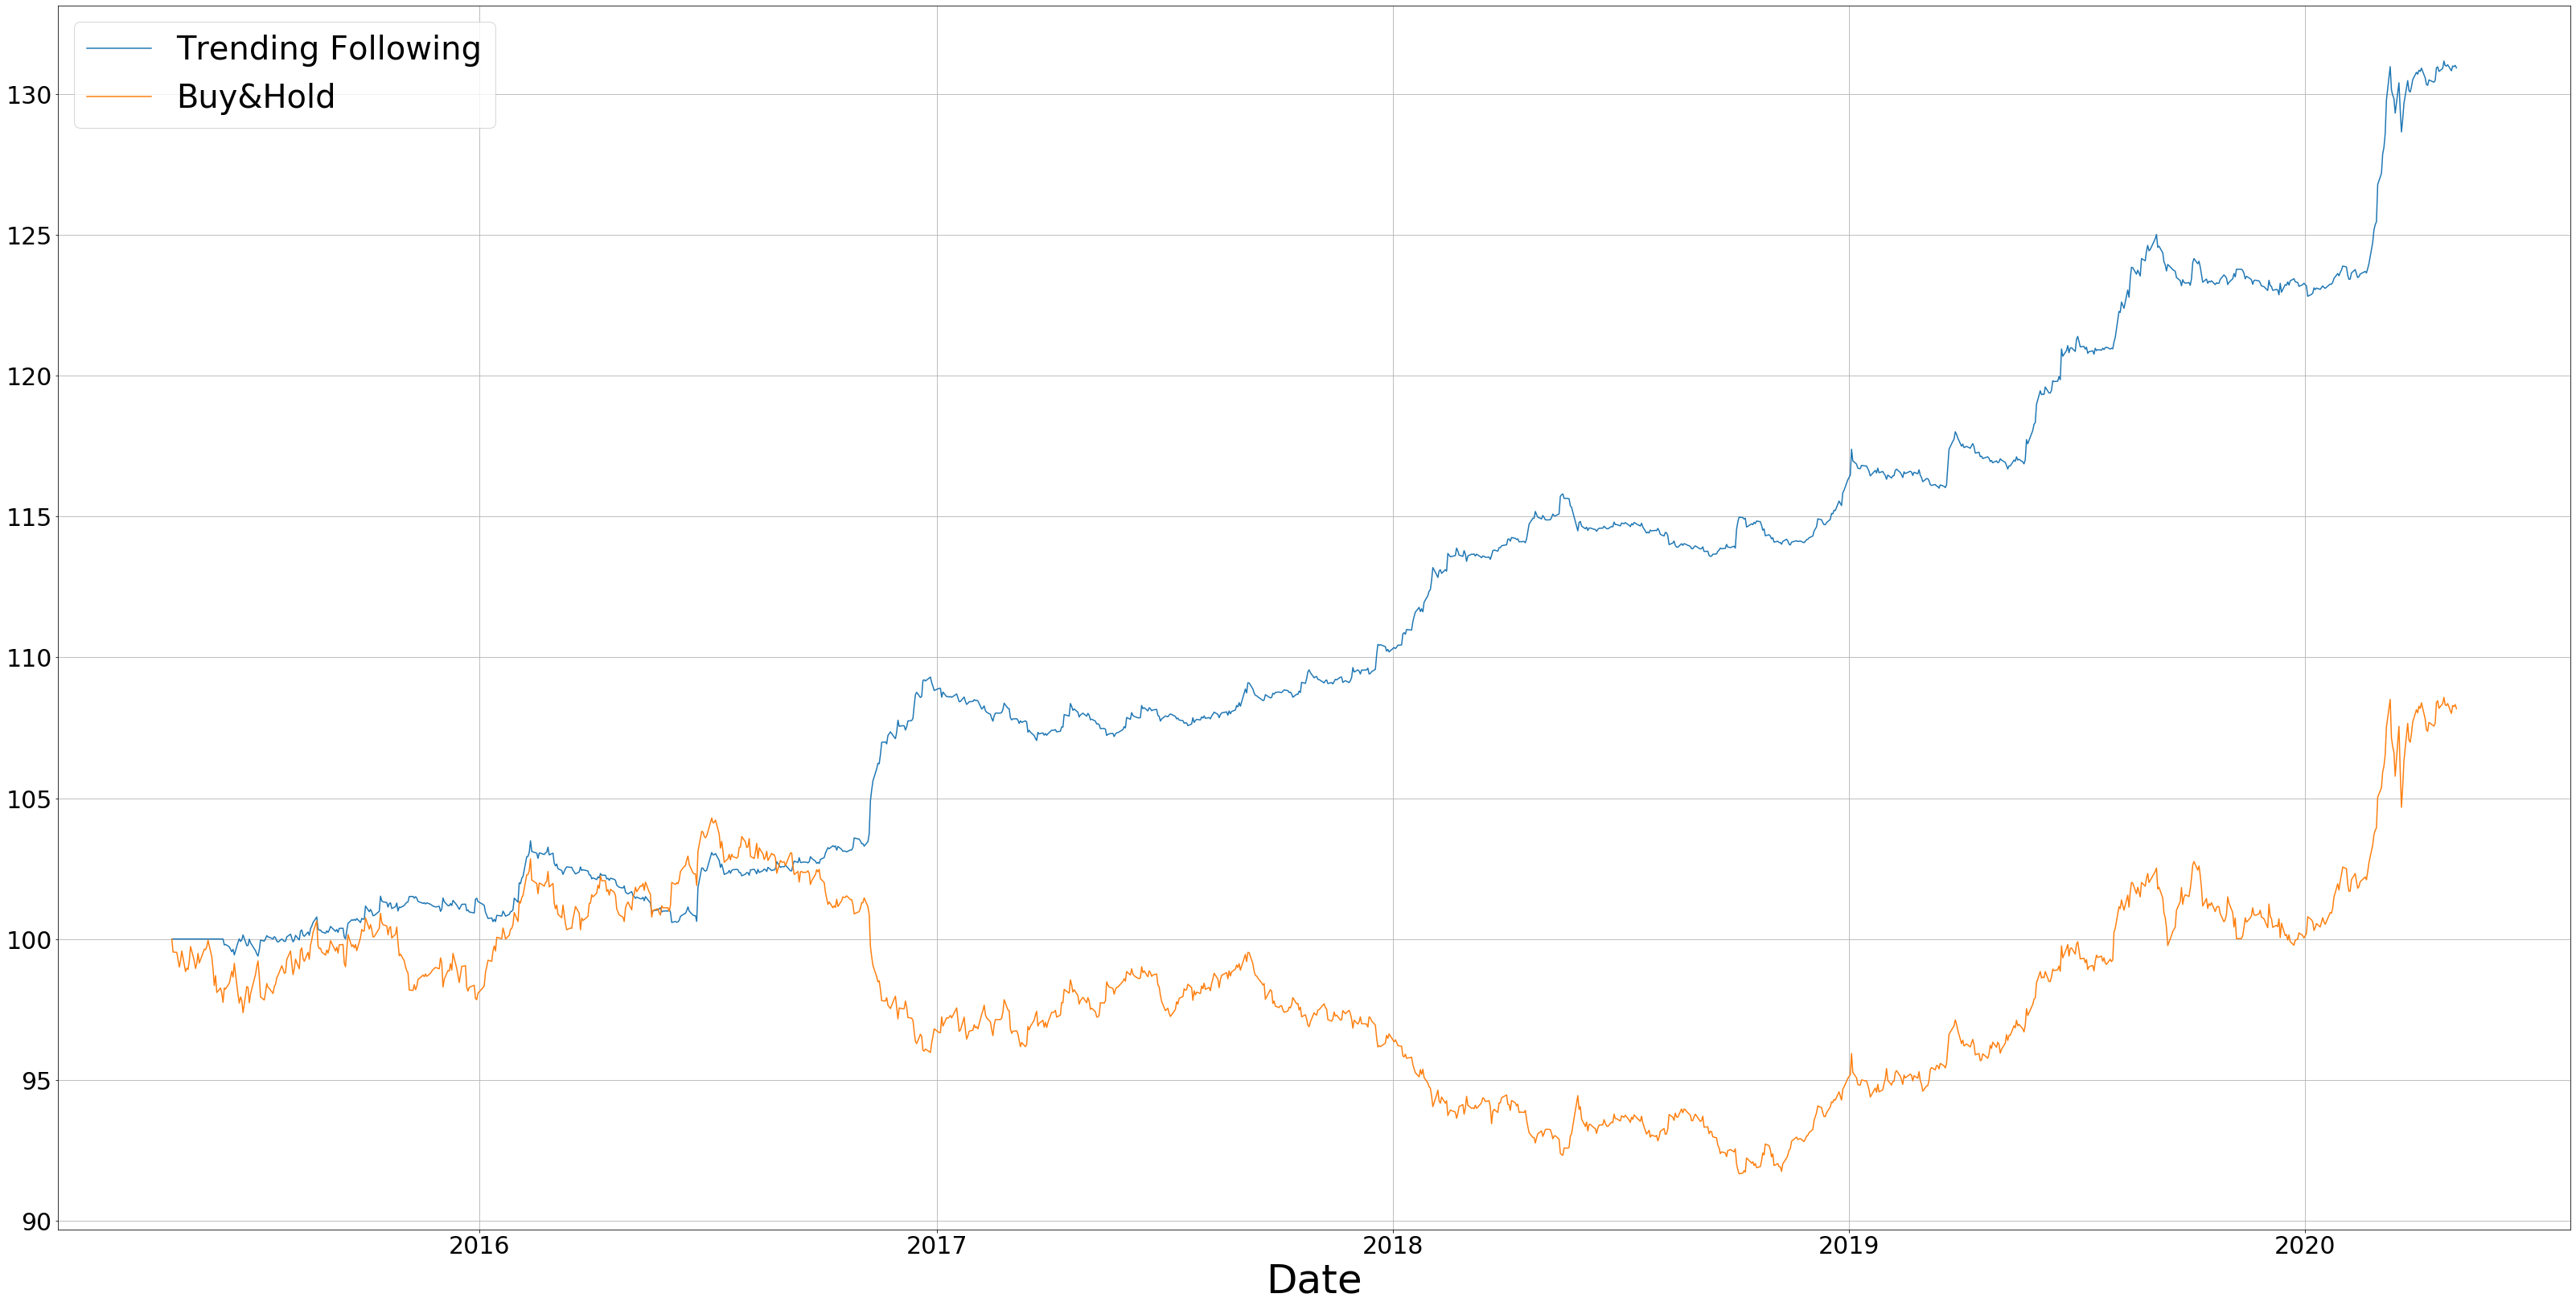

In [22]:
# Grafico la evolucion de las estrategias

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(Resultados["Trending Following"])
ax1 = plt.plot(Resultados["Buy&Hold"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Trending Following", "Buy&Hold"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [23]:
US_Treasury_medias = pd.DataFrame(Resultados.loc[:, 'Trending Following'])
US_Treasury_medias.columns = ['TF US_Treasury']
US_Treasury_medias

,TF US_Treasury
Date,
2015-04-30,100.000000
2015-05-01,100.000000
2015-05-04,100.000000
2015-05-05,100.000000
2015-05-06,100.000000
2015-05-07,100.000000
2015-05-08,100.000000
2015-05-11,100.000000
2015-05-12,100.000000


In [24]:
US_Treasury_medias.to_csv('./data_resultante/TFUS_Treasury.csv')